Probemos buscar el mínimo de la función; ejercicio 01

$$ f(x, y) = \frac{1}{2} (a x^2 + b y^2) $$


In [3]:
import numpy as np
from pylab import *
import copy

In [4]:
# r es el vector X,Y; 
def test_fn(r, a, b):
  return 0.5*(a*r[0]**2 + b*r[1]**2)

# esta funcion esta calculada a mano, haciendo la derivada
def grad(r, a, b):
  return [a*r[0], b*r[1]]

aa = 1.0
bb = 0.1
xx = np.linspace(-2*bb, 0.5, num=100)
yy = np.linspace(-bb, 1 + bb, num=200)
X, Y = np.meshgrid(xx, yy, indexing='ij')
rr = np.array([[(x, y) for x in xx] for y in yy])

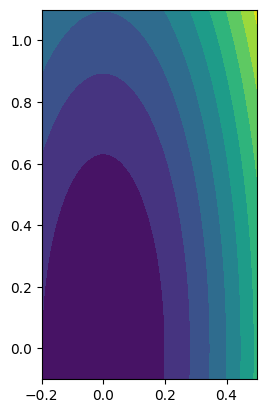

In [5]:
contourf(X, Y, test_fn([X, Y], aa, bb), levels=10)
gca().set_aspect('equal')

In [ ]:
# Gradient descent

Nsteps = 30
step = 2.0/(1+bb)  # Elegido con el criterio de exact line search; es nuestro alfa
xk = np.zeros(Nsteps+1)
yk = np.zeros(Nsteps+1)
fk = np.zeros(Nsteps+1)

# El punto inicial es (bb, 1.0); nuestro X0
xk[0] = bb
yk[0] = 1.0
fk[0] = test_fn((bb, 1.0), aa, bb)

for ii in range(Nsteps):
  xk[ii+1] = xk[ii] - step*grad((xk[ii], yk[ii]), aa, bb)[0]
  yk[ii+1] = yk[ii] - step*grad((xk[ii], yk[ii]), aa, bb)[1]
  fk[ii+1] = test_fn((xk[ii+1], yk[ii+1]), aa, bb)

x_gd = copy.copy(xk)
y_gd = copy.copy(yk)

In [9]:
xk


array([ 0.1       , -0.08181818,  0.06694215, -0.05477085,  0.04481251,
       -0.03666478,  0.02999846, -0.02454419,  0.02008161, -0.01643041,
        0.01344306, -0.01099887,  0.00899908, -0.00736288,  0.00602417,
       -0.00492887,  0.00403271, -0.00329949,  0.00269958, -0.00220875,
        0.00180716, -0.00147859,  0.00120975, -0.0009898 ,  0.00080983,
       -0.00066259,  0.00054212, -0.00044355,  0.00036291, -0.00029692,
        0.00024294])

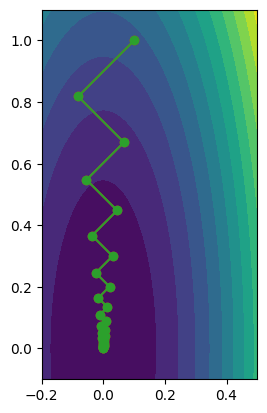

In [10]:
contourf(X, Y, test_fn([X, Y], aa, bb), levels=15)
plot(xk, yk, color='C3', marker='o')
plot(x_gd, y_gd, color='C2', marker='o')
gca().set_aspect('equal')

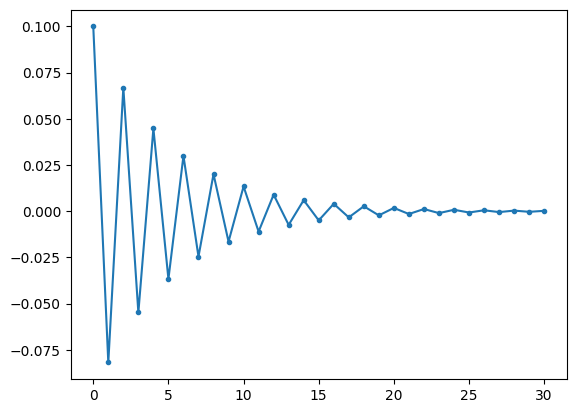

In [11]:
plot(xk, marker='.')